<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Proyek_PCVK_Berdua_Brillianta_Dela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brilliantna Salsabila / 2241720041

# Dela Farahita Zain    / 2241720058

# **Deteksi Penggunaan Masker Kesehatan pada Wajah**

# Import Folder yang Ada di Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [12]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

# Menetapkan Path untuk Data Pelatihan
Menentukan lokasi penyimpanan data yang akan digunakan untuk melatih model.

In [13]:
from pathlib import Path

x  = "/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset"
path = Path(x)
path.ls()

(#3) [Path('/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask'),Path('/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/.ipynb_checkpoints'),Path('/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/without_mask')]

# Memuat data untuk pelatihan
Mengatur dan memuat data pelatihan ke dalam program.

In [14]:
from fastai.vision.all import *
import numpy as np

# Pastikan path sudah benar, menggantikan dengan direktori data yang digunakan
path = Path("/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset")

# Menetapkan seed untuk hasil yang konsisten
np.random.seed(40)

# Mendefinisikan blok data
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),      # Menentukan tipe data (gambar dan kategori)
    get_items=get_image_files,               # Mengambil file gambar dari folder
    splitter=RandomSplitter(valid_pct=0.2),  # Membagi data 80% pelatihan, 20% validasi
    get_y=parent_label,                      # Mendapatkan label berdasarkan nama folder induk
    item_tfms=Resize(224),                   # Mengubah ukuran gambar menjadi 224x224
    batch_tfms=aug_transforms(do_flip=True) + [Normalize.from_stats(*imagenet_stats)]  # Augmentasi dan normalisasi
)

# Memuat data dari path yang ditentukan
data = data_block.dataloaders(path, bs=64, num_workers=4)


#  Eksplorasi Data
Melakukan analisis awal untuk memahami struktur dan karakteristik data.

In [15]:
from PIL import Image

def verify_images(path):
    failed_images = []
    for img_path in get_image_files(path):
        try:
            img = Image.open(img_path)
            img.verify()  # Verifikasi file
        except (IOError, SyntaxError):
            failed_images.append(img_path)
    return failed_images

failed_images = verify_images(path)
print(f"Jumlah gambar yang gagal dikenali: {len(failed_images)}")
print(failed_images)


Jumlah gambar yang gagal dikenali: 0
[]


In [16]:
for img_path in failed_images:
    try:
        img = Image.open(img_path)
        img = img.convert("RGB")  # Konversi ke RGB
        img.save(img_path)        # Simpan ulang
    except Exception as e:
        print(f"Gagal memproses {img_path}: {e}")


In [17]:
for img_path in failed_images:
    img_path.unlink()  # Hapus file yang bermasalah


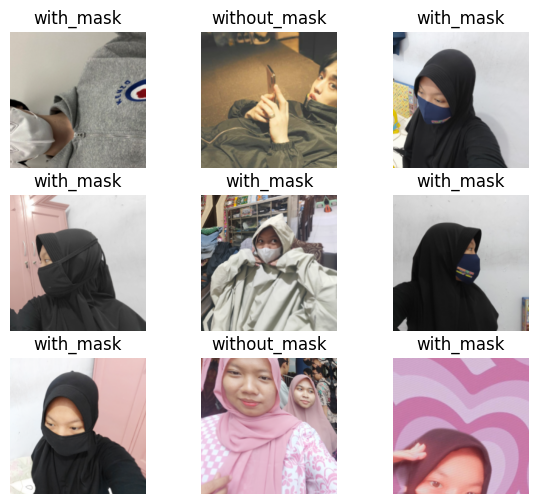

In [18]:
# Menampilkan batch data dengan 3 baris dan ukuran gambar yang ditentukan
data.show_batch(max_n=9, figsize=(7,6))


# Mengecek jumlah data di pelatihan dan validasi

In [19]:
# Menampilkan panjang data pelatihan dan validasi
print(f'Jumlah data pelatihan: {len(data.train)}')
print(f'Jumlah data validasi: {len(data.valid)}')


Jumlah data pelatihan: 1
Jumlah data validasi: 1


# Menampilkan Kelas yang Ada dalam Data
Menampilkan label atau kategori kelas yang ada dalam data pelatihan.

In [20]:
print(data.vocab)  # Menampilkan kelas-kelas yang ada di dataset
print(len(data.vocab))  # Menampilkan jumlah kelas


['with_mask', 'without_mask']
2


In [21]:
# Memuat data dari path yang ditentukan
data = data_block.dataloaders(path, bs=64, num_workers=4)

# Menampilkan output seperti ImageDataBunch
print(f"ImageDataBunch;\n")
print(f"Train: LabelList ({len(data.train.items)} items)")
print(f"x: ImageList")
# Menampilkan beberapa gambar (3 channel, ukuran 224x224)
print(f"Image (3, 224, 224)," * 5)
print(f"y: CategoryList")
# Menampilkan beberapa label dari data pelatihan
print(','.join([str(lbl) for lbl in data.train.dataset.items[:5]]))
print(f"Path: {path};\n")

print(f"Valid: LabelList ({len(data.valid.items)} items)")
print(f"x: ImageList")
# Menampilkan beberapa gambar (3 channel, ukuran 224x224)
print(f"Image (3, 224, 224)," * 5)
print(f"y: CategoryList")
# Menampilkan beberapa label dari data validasi
print(','.join([str(lbl) for lbl in data.valid.dataset.items[:5]]))
print(f"Path: {path};\n")

print(f"Test: None")

ImageDataBunch;

Train: LabelList (64 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),
y: CategoryList
/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask/IMG20241115132418.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask/IMG_20240206_154325.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask/IMG20241115132329.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask/IMG_20220710_160951.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask/IMG_20241115_133646.jpg
Path: /content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset;

Valid: LabelList (16 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),
y: CategoryList
/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/dataset/with_mask/IMG_20220809_1

# Membuat Model
Membangun arsitektur model untuk deteksi masker wajah.

In [22]:
learn = vision_learner(data, models.resnet50, metrics=[accuracy], model_dir=Path('../kaggle/working'), path=Path("."))


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 171MB/s]


# Menemukan Learning Rate (LR)
Mengidentifikasi learning rate yang optimal untuk melatih model.

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

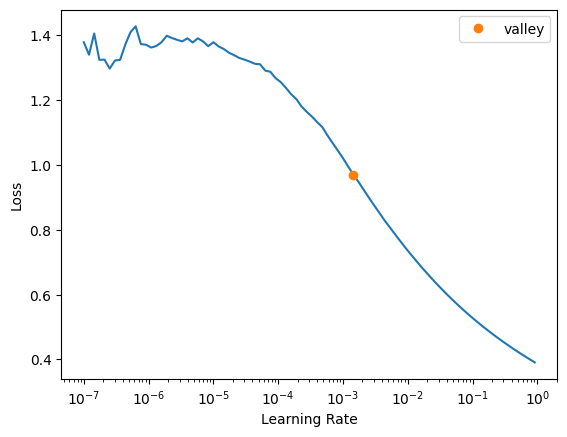

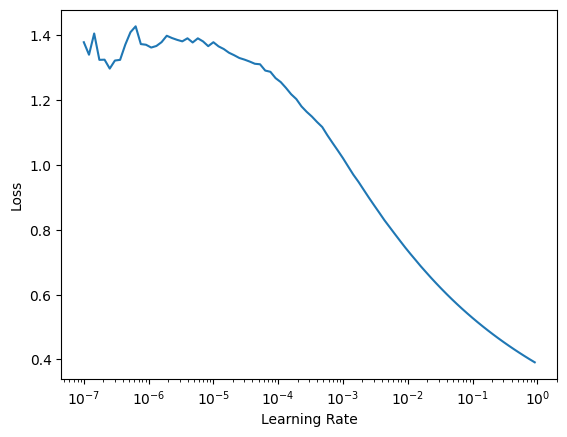

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

learn.lr_find()
learn.recorder.plot_lr_find()

# Melatih Model
Melakukan proses pelatihan model menggunakan data yang telah dimuat.

In [24]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.410658,4.251933,0.750000,00:19
1,1.264936,131.221481,0.312500,00:17
2,2.385059,17.349525,0.625000,00:16
3,2.955328,11.230540,0.750000,00:17


# Tuning Hyper Parameter
Menyesuaikan parameter model untuk meningkatkan kinerja.

In [25]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.264302,7.289085,0.687500,00:16
1,3.126893,5.585705,0.750000,00:16
2,3.003807,4.656430,0.687500,00:18
3,2.489605,4.169727,0.687500,00:16
4,2.123997,3.558326,0.687500,00:17
5,1.858389,3.025711,0.687500,00:17
6,1.636420,2.715925,0.687500,00:16
7,1.466991,2.514534,0.687500,00:18
8,1.366062,2.421098,0.750000,00:17
9,1.276715,2.444331,0.750000,00:16


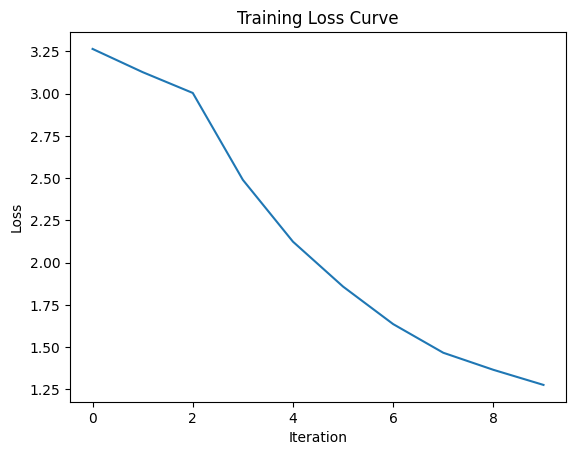

In [26]:
import matplotlib.pyplot as plt

# Plotting training and validation losses
plt.plot(learn.recorder.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


# Menginterpretasikan Hasil
Mengevaluasi performa model berdasarkan hasil yang diperoleh.

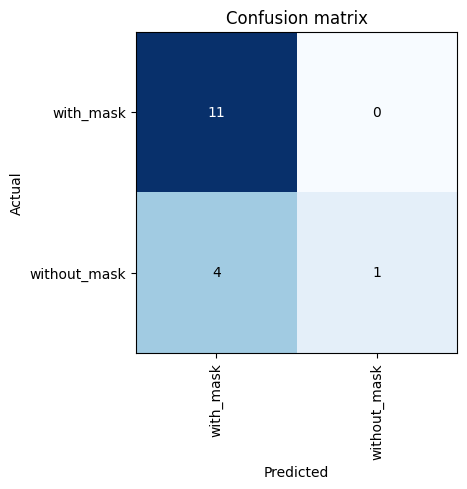

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

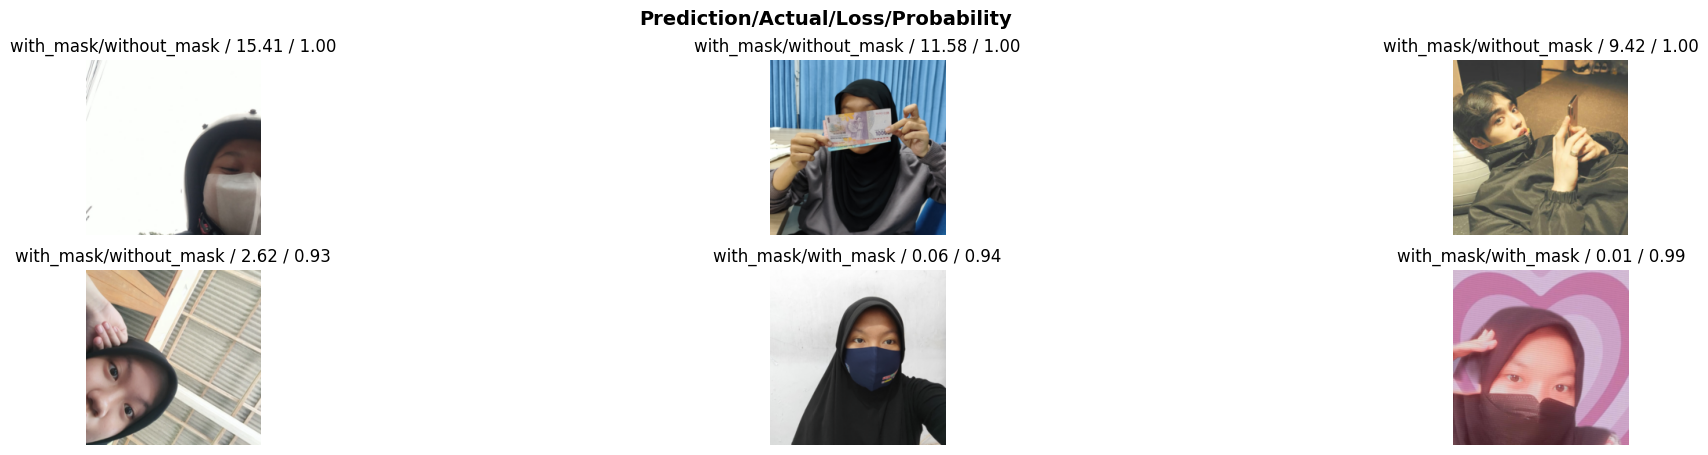

In [28]:
interp.plot_top_losses(6,figsize = (25,5))

# Menyimpan dan Memuat Model
Menyimpan model yang sudah dilatih dan memuatnya kembali untuk penggunaan selanjutnya.

In [29]:
# Mengekspor model ke file 'export.pkl' di direktori '/kaggle/working'
learn.export("/kaggle/working/export.pkl")

# Mengatur direktori untuk menyimpan model
learn.model_dir = "/kaggle/working"

# Menyimpan model dengan nama 'stage-1' tanpa menggunakan 'return_path'
learn.save("stage-1")


Path('/kaggle/working/stage-1.pth')